In [1]:
cd Desktop


/Users/pp/Desktop


In [2]:
cd NU

/Users/pp/Desktop/NU


In [3]:
cd 21F

/Users/pp/Desktop/NU/21F


In [4]:
cd ml

/Users/pp/Desktop/NU/21F/ml


In [5]:
cd machine_learning_refined

/Users/pp/Desktop/NU/21F/ml/machine_learning_refined


In [5]:
cd mlrefined

/Users/pp/Desktop/NU/21F/ml/mlrefined


In [6]:
%matplotlib widget

In [7]:
pip install matplotlib

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install autograd

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install scipy

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install pandas

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install ipympl

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install nodejs

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [13]:
import matplotlib.pyplot as plt
import autograd.numpy as np

In [14]:
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import autograd.numpy as np
from mlrefined_libraries import calculus_library as calib
from mlrefined_libraries import math_optimization_library as optlib
static_plotter = optlib.static_plotter.Visualizer();
optimizers = optlib.optimizers
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True
%load_ext autoreload
%autoreload 2

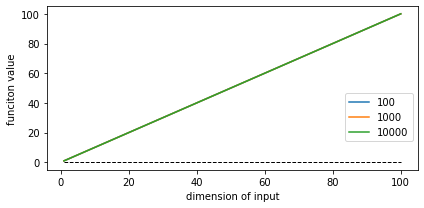

In [15]:
%matplotlib inline
optlib.random_method_experiments.random_eval_experiment()

In [16]:
from mlrefined_libraries import calculus_library as calib
from mlrefined_libraries import math_optimization_library as optlib
# import demos for this notebook
optlib.static_plotter.Visualizer();
optlib.optimizers
%matplotlib notebook
rcParams['figure.autolayout'] = True
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


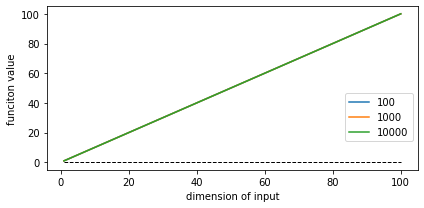

In [35]:

%matplotlib inline
optlib.random_method_experiments.random_eval_experiment()

In [ ]:
def random_search(g,a,maxx,w,num):
    whistory = [] 
    chistory = [] 
    al = 0
    for k in range(1,maxx+1):
        if a == 'diminishing':
            al = 1/float(k)
        else:
            al = a
        whistory.append(w)
        chistory.append(g(w))
        direction = np.random.randn(num_sam,np.size(w))
        norms = np.sqrt(np.sum(direction*direction,axis = 1))[:,np.newaxis]
        direction = direction/norms
        w_can = w + al*direction
        evals = np.array([g(w_val) for w_val in w_can])
        ind = np.argmin(evals)
        if g(w_can[ind]) < g(w):
            d = direction[ind,:]
            w = w + al*d
    whistory.append(w)
    chistory.append(g(w))
    return whistory,chistory

In [ ]:
g = lambda w: 100*(w[1] - w[0]**2)**2 + (w[0] - 1)**2
a = 1
w = np.array([-2,-2])
num = 1000
maxx = 50
wh,ch = random_search(g,a,maxx,w,num)
static_plotter.two_input_contour_plot(g,wh,num_contours = 35,xmin = -2.5,xmax = 2.5,ymin = -2.25,ymax = 2)

In [ ]:
g = lambda w: 100*(w[1] - w[0]**2)**2 + (w[0] - 1)**2
a = 'diminishing'; 
w = np.array([-2,-2]); 
num = 1000; 
maxx= 50;
wh2,ch2 = random_search(g,a,maxx,w,num)

In [ ]:
# show run in both three-dimensions and just the input space via the contour plot
static_plotter.compare_runs_contour_plots(g,[wh,wh2],contours = 35,xmin = -2.5,xmax = 2.5,ymin = -2.25,ymax = 2,show_original = False)

In [ ]:
def gradientdescent(a,maxx,w):
    g = lambda w: 1/50*(w**4 + w**2 + 10*w)
    grad = lambda w: 1/50*(4*w**3 + 2*w + 10)
    ch = [g(w)] 
    for k in range(1,maxx+1):
        geval = grad(w)
        w = w - a*geval
        ch.append(g(w))
    return ch

In [ ]:
w = 2.0
maxx = 1000
a = 10**(0)
ch1 = gradientdescent(a,maxx,w)
a = 10**(-1)
ch2 = gradientdescent(a,maxx,w)
a = 10**(-2)
ch3 = gradientdescent(a,maxx,w)
static_plotter.plot_cost_histories([ch1,ch2,ch3],start = 0,points= False,labels = 
                                   [r'$\alpha = 1$',r'$\alpha = 10^{-1}$',r'$\alpha = 10^{-2}$'])

In [39]:
from autograd import grad
from autograd import hessian

In [40]:

def newtons_method(g,maxx,w,**args):
    gradient = grad(g)
    h = hessian(g)
    e = 10**(-10)
    if 'epsilon' in args:
        e = args['epsilon']
    wh = [w]
    ch = [g(w)]
    for k in range(maxx):
        grade = gradient(w)
        he = h(w)
        he.shape = (int((np.size(he))**(0.5)),int((np.size(he))**(0.5)))
        a = he + e*np.eye(w.size)
        b = grade
        w = np.linalg.solve(a,np.dot(a,w) - b)
        wh.append(w)
        ch.append(g(w))
    return wh,ch

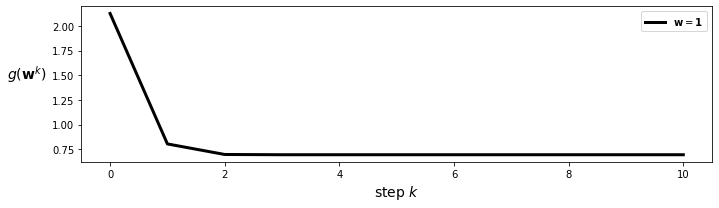

In [41]:
g = lambda w: np.log(1 + np.exp(np.dot(w.T,w)))
w = np.ones((2,)); maxx = 10;
wh,ch = newtons_method(g,maxx,w)
static_plotter.plot_cost_histories([ch],start = 0,points = False,labels= [r'$\mathbf{w}=\mathbf{1}$'])

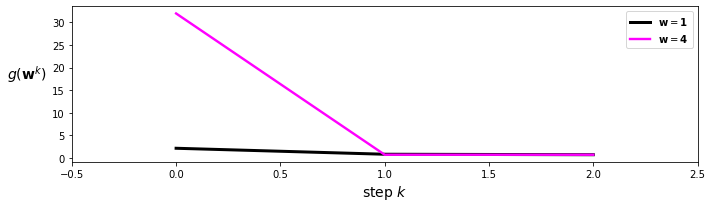

In [42]:
w = np.ones((2,)); maxx = 2;
wh,ch = newtons_method(g,maxx,w)
w = 4*np.ones((2,)); maxx = 2;
wh2,ch2 = newtons_method(g,maxx,w)
static_plotter.plot_cost_histories([ch,ch2],start = 0,points= False,
                                   labels = [r'$\mathbf{w}=\mathbf{1}$',r'$\mathbf{w}=\mathbf{4}$'])

In [64]:
from matplotlib import rcParams
from mlrefined_libraries import calculus_library as calib
from mlrefined_libraries import math_optimization_library as optlib
from mlrefined_libraries import superlearn_library as superlearn


# regress_plotter = superlearn.lin_regression_demos
# optimizers = optlib.optimizers
# static_plotter = optlib.static_plotter.Visualizer();
# dp = '/mlrefined_exercises/ed_2/mlrefined_datasets/superlearn_datasets/'
# plotter = superlearn.multi_outupt_plotters


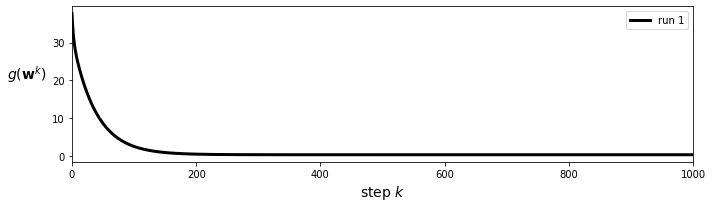

In [71]:
csvname = 'mlrefined_exercises/ed_2/mlrefined_datasets/superlearn_datasets/kleibers_law_data.csv'
data = np.loadtxt(csvname,delimiter=',')
x = data[:-1,:]
y = data[-1:,:]
x = np.log(x)
y = np.log(y)

def new_gradient_descent(g,a,maxx,w):
    gradient = grad(g)
    wh = [w] 
    ch = [g(w)] 
    for k in range(maxx):
        grade = gradient(w)
        w = w - a*grade
        wh.append(w)
        ch.append(g(w))
    return wh,ch
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T
def least(w):
    cost = np.sum((model(x,w) - y)**2)
    return cost/float(np.size(y))
g = least
w = 0.1*np.random.randn(2,1)
maxx = 1000
a = 10**(-2)
wh, ch = new_gradient_descent(g,a,maxx,w)
static_plotter.plot_cost_histories([ch],start = 0,points = False,labels= ['run 1'])

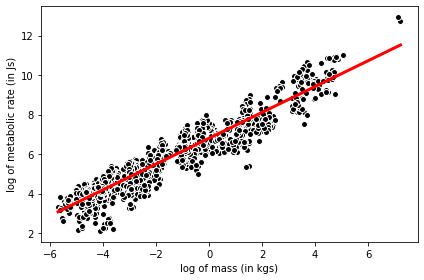

In [73]:
s = np.linspace(np.min(x),np.max(x))
w = wh[-1]
t = w[0] + w[1]*s
figure = plt.figure()
plt.plot(s,t,linewidth = 3,color = 'r')
plt.scatter(x,y,linewidth = 1,c='k',edgecolor='w')
plt.xlabel('log of mass (in kgs)')
plt.ylabel('log of metabolic rate (in Js)')
plt.show()

In [74]:
def normalize(x):
    xmeans = np.nanmean(x,axis = 1)[:,np.newaxis]
    xstds = np.nanstd(x,axis = 1)[:,np.newaxis]
    ind = np.argwhere(xstds < 10**(-2))
    if len(ind) > 0:
        ind = [v[0] for v in ind]
        ad = np.zeros((xstds.shape))
        ad[ind] = 1.0
        xstds += ad
    ind = np.argwhere(np.isnan(x) == True)
    for i in ind:
        x[i[0],i[1]] = xmeans[i[0]]
    return lambda data: (data - xmeans)/xstds,lambda data: data*xstds + xmeans

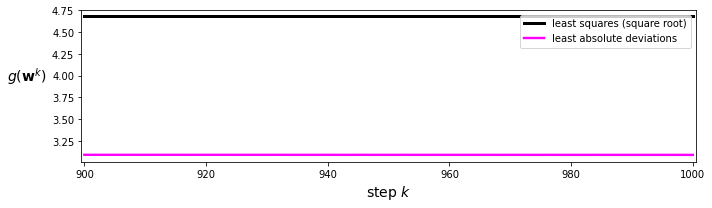

In [82]:
csvname = 'mlrefined_exercises/ed_2/mlrefined_datasets/superlearn_datasets/boston_housing.csv'
data = np.loadtxt(csvname,delimiter=',')
x = data[:-1,:]
y = data[-1:,:]
norm,inverse_norm = normalize(x)
x = norm(x)
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T
def ls(w):
    cost = np.sum((model(x,w) - y)**2)
    return cost/float(np.size(y))
def lad(w):
    cost = np.sum(np.abs(model(x,w) - y))
    return cost/float(np.size(y))
g = ls 
w = 0.1*np.random.randn(x.shape[0]+1,1)
maxx = 1000 
a = 10**(-1)
wh1,ch1 = optimizers.gradient_descent(g,alpha_choice,max_its,w)
ch1 = [c**(0.5) for c in ch1]
g = lad
wh2,ch2 = optimizers.gradient_descent(g,a,maxx,w)
static_plotter.plot_cost_histories([ch1,ch2],start = 900,points = False,
                                   labels = ['least squares (square root)','least absolute deviations'])

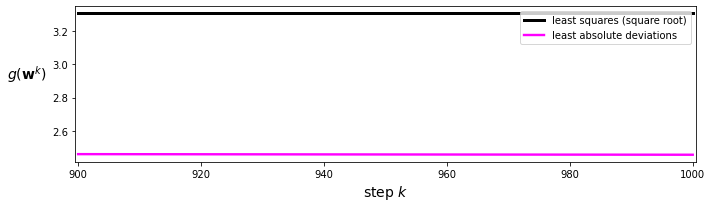

In [83]:
csvname = 'mlrefined_exercises/ed_2/mlrefined_datasets/superlearn_datasets/auto_data.csv'
data = np.loadtxt(csvname,delimiter=',')
x = data[:-1,:]
y = data[-1:,:]
norm,inverse_norm = normalize(x)
x = norm(x)
g = ls;
w = 0.1*np.random.randn(x.shape[0]+1,1); 
maxx = 1000; 
a = 10**(-1);
wh1,ch1 = optimizers.gradient_descent(g,a,maxx,w)
ch1 = [c**(0.5) for c in ch1]
g = lad;
wh2,ch2 = optimizers.gradient_descent(g,alpha_choice,max_its,w)
static_plotter.plot_cost_histories([ch1,ch2],start = 900,points = False,
                                   labels = ['least squares (square root)','least absolute deviations'])

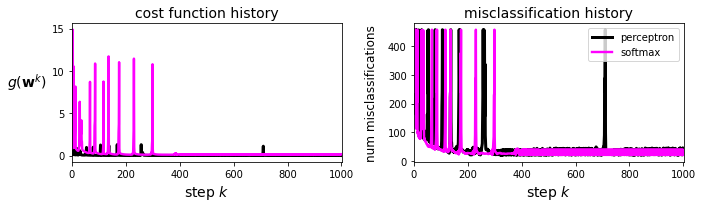

the smallest number of misclassifications provided by minimizing the perceptron 19
the smallest number of misclassifications provided by minimizing the softmax 21


In [21]:
from mlrefined_libraries import calculus_library as calib
from mlrefined_libraries import math_optimization_library as optlib
from mlrefined_libraries import superlearn_library as superlearn
csvname = 'mlrefined_exercises/ed_2/mlrefined_datasets/superlearn_datasets/breast_cancer_data.csv'
data1 = np.loadtxt(csvname,delimiter = ',')
# get input and output of dataset
x = data1[:-1,:]
y = data1[-1:,:]
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T
def perceptron(w):
    cost = np.sum(np.maximum(0,-y*model(x,w)))
    return cost/float(np.size(y))
def softmax(w):
    cost = np.sum(np.log(1 + np.exp(-y*model(x,w))))
    return cost/float(np.size(y))
N = x.shape[0]
a = 10**(-1)
maxx = 1000
w = 0.1*np.random.randn(N+1,1)
g = perceptron;
wh1,ch1 = optimizers.gradient_descent(g,a,maxx,w)
a = 10**(0)
g = softmax;
wh2,ch2 = optimizers.gradient_descent(g,a,maxx,w)
def countingCost(w,x,y):
    y_hat = np.sign(model(x,w))
    ind = np.argwhere(y != y_hat)
    ind = [v[1] for v in ind]
    cost = np.sum(len(ind))
    return cost
c1 = [countingCost(v,x,y) for v in wh1]
c2 = [countingCost(v,x,y) for v in wh2]
classif_plotter = superlearn.classification_static_plotter.Visualizer()
cost = [c1,c2]
count = [c1,c2]
classif_plotter.plot_histories(cost,count,start = 0,points = False,labels = ['perceptron','softmax'])
best_percept = np.min(c1)
best_soft = np.min(c2)
print ('Misclassifications of minimizing perceptron: ' + str(best_percept))
print ('Misclassifications of minimizing softmax: ' + str(best_soft))

In [38]:
def standardNormalizer(x):
    xmeans = np.nanmean(x,axis = 1)[:,np.newaxis]
    xstds = np.nanstd(x,axis = 1)[:,np.newaxis]
    ind = np.argwhere(xstds < 10**(-2))
    if len(ind) > 0:
        ind = [v[0] for v in ind]
        adjust = np.zeros((xstds.shape))
        adjust[ind] = 1.0
        xstds += adjust
    ind = np.argwhere(np.isnan(x) == True)
    for i in ind:
        x[i[0],i[1]] = xmeans[i[0]]
    normalizer = lambda data: (data - xmeans)/xstds
    inverse_norm = lambda data: data*xstds + xmeans
    return normalizer,inverse_norm

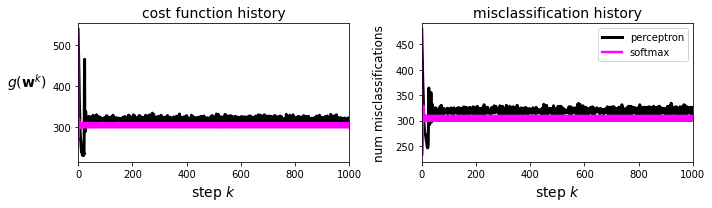

Misclassifications of minimizing the perceptron: 0.002018065018519048
Accuracy of minimizing: 0.9999979819349815


In [39]:
csvname = 'mlrefined_exercises/ed_2/mlrefined_datasets/superlearn_datasets/credit_dataset.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:]
ind0 = np.argwhere(y==-1)
ind1 = np.argwhere(y==+1)
normalizer,inverse_norm = standardNormalizer(x)
x = normalizer(x)
N = x.shape[0]
a = 10**(-1)
maxx = 1000
w = 0.1*np.random.randn(N+1,1)
g = perceptron;
wh1,ch1 = optimizers.gradient_descent(g,a,maxx,w)
a = 10**(1)
g = softmax;
wh2,ch2 = optimizers.gradient_descent(g,a,maxx,w)
def countingCost(w,x,y):
    y_hat = np.sign(model(x,w))
    ind = np.argwhere(y != y_hat)
    ind = [v[1] for v in ind]
    cost = np.sum(len(ind))
    return cost
c1 = [countingCost(v,x,y) for v in wh1]
c2 = [countingCost(v,x,y) for v in wh2]
classif_plotter = superlearn.classification_static_plotter.Visualizer()
cost = [c1,c2]
count = [count_history_1,count_history_2]
classif_plotter.plot_histories(cost,count,start = 0,points = False,labels = ['perceptron','softmax'])
best = np.min(ch1)
acc = (1 - best/y.size)
print ('Misclassifications of minimizing the perceptron: ' + str(best))
print ('Accuracy of minimizing: ' + str(acc))

In [49]:
def balanced_accuracy(w,x,y):
    yhat = np.sign(model(x,w))
    ind0 = np.argwhere(y == -1)
    ind0 = [v[1] for v in ind0]
    num0 = len(ind0)
    ind = np.argwhere(np.abs(y[:,ind0] - yhat[:,ind0]) > 0)
    c0 = len(ind)
    ind1 = np.argwhere(y == +1)
    ind1 = [v[1] for v in ind1]
    num1 = len(ind1)
    ind = np.argwhere(np.abs(y[:,ind1] - yhat[:,ind1]) > 0)
    c1 = len(ind)
    acc0 = 1 - c0/num0
    acc1 = 1 - c1/num1
    return (acc0 + acc1)/2
betas = np.array([1.0,5.0])
def sigmoid(t):
    return 1/(1 + np.exp(-t))
def weighted_softmax(w,betas):
    a = sigmoid(model(x,w))
    ind = np.argwhere(y == -1)[:,1]
    cost = -betas[0]*np.sum(np.log(1 - a[:,ind]))
    ind = np.argwhere(y==+1)[:,1]
    cost -= betas[1]*np.sum(np.log(a[:,ind]))
    return cost/y.size

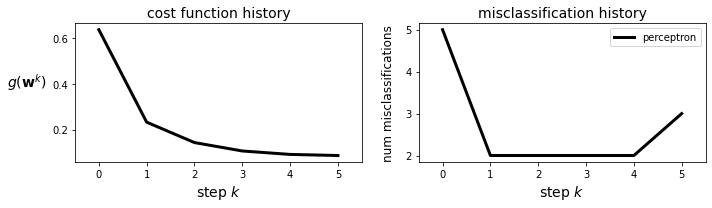

In [50]:
csvname = 'mlrefined_exercises/ed_2/mlrefined_datasets/superlearn_datasets/3d_classification_data_v2_mbalanced.csv'
data1 = np.loadtxt(csvname,delimiter = ',')
x = data1[:-1,:]
y = data1[-1:,:]
ind0 = np.argwhere(y==-1)
ind1 = np.argwhere(y==+1)
betas = np.array([1.0,1.0])
softmax = lambda w,betas = betas: weighted_softmax(w,betas)
N = x.shape[0]
maxx = 5
w = 0.1*np.random.randn(N+1,1)
g = softmax;
wh1,c1 = optimizers.newtons_method(g,maxx,w)
classif_plotter = superlearn.classification_static_plotter.Visualizer()
cost = [c1]
count = [[counting_cost(v,x,y) for v in wh1]]
classif_plotter.plot_histories(cost,count,start = 0,points = False,labels = ['perceptron','softmax'])

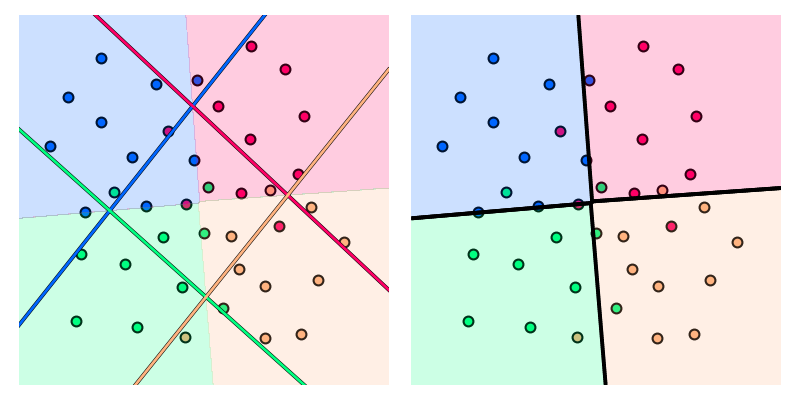

In [37]:
from mlrefined_libraries import calculus_library as calib
from mlrefined_libraries import math_optimization_library as optlib
from mlrefined_libraries import superlearn_library as superlearn
csvname = 'mlrefined_exercises/ed_2/mlrefined_datasets/superlearn_datasets/4class_data.csv'
data = np.loadtxt(csvname,delimiter = ',')
p = superlearn.ova_illustrator.Visualizer(data)
# p.show_dataset()
p.solve_2class_subproblems()
p.show_complete_coloring()

In [32]:
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

In [44]:
def multiclass_perceptron(w):
    evals = model(x,w)
    a = np.max(evals,axis = 0)
    b = evals[y.astype(int).flatten(),np.arange(np.size(y))]
    cost = np.sum(a - b)
    cost = cost + (10**-3)*np.linalg.norm(w[1:,:],'fro')**2
    return cost/np.size(y)

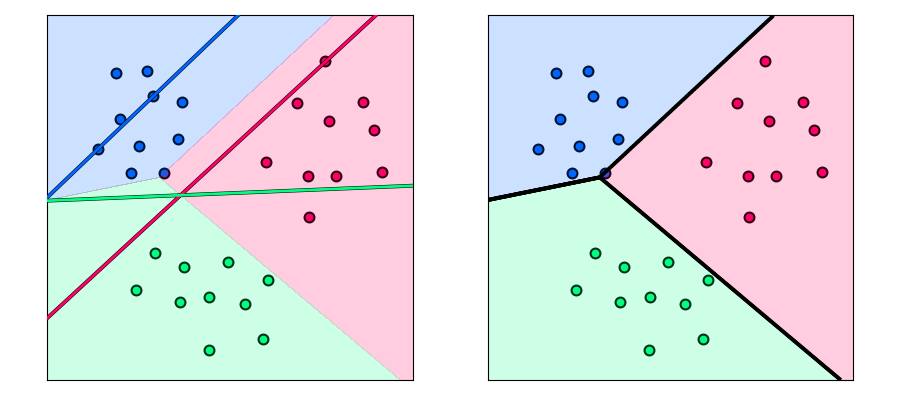

In [52]:
data = np.loadtxt('mlrefined_exercises/ed_2/mlrefined_datasets/superlearn_datasets/3class_data.csv',delimiter = ',')
p = superlearn.multiclass_illustrator.Visualizer(data)
x = data[:-1,:]
y = data[-1:,:]
g = multiclass_perceptron
w = 0.1*np.random.randn(3,3); maxx = 1000; a = 10**(-1);
wh,ch = optimizers.gradient_descent(g,alpha_choice,max_its,w)
p.show_complete_coloring(wh, cost = multiclass_perceptron)

In [17]:
pip install scikit-learn

     |████████████████████████████████| 8.0 MB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 25.8 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [15]:
import sys
import pandas as pd
# import sklearn
import matplotlib.pyplot as plt
import autograd.numpy as np
sys.path.append('../')
from mlrefined_libraries import calculus_library as calib
from mlrefined_libraries import superlearn_library as superlearn

In [16]:
from sklearn.datasets import fetch_openml
x,y= fetch_openml('mnist_784', version=1,return_X_y=True)

In [17]:
x = x.T
y = np.array([int(v) for v in y])[np.newaxis,:]

In [18]:
num_sample = 50000
inds = np.random.permutation(y.shape[1])[:num_sample]
x_sample = x.iloc[:,inds].values
y_sample = y[:,inds]

In [19]:
def standard_normalizer(x):
    x_means = np.nanmean(x,axis = 1)[:,np.newaxis]
    x_stds = np.nanstd(x,axis = 1)[:,np.newaxis]
    ind = np.argwhere(x_stds < 10**(-2))
    if len(ind) > 0:
        ind = [v[0] for v in ind]
        adjust = np.zeros((x_stds.shape))
        adjust[ind] = 1.0
        x_stds += adjust
    ind = np.argwhere(np.isnan(x) == True)
    for i in ind:
        x[i[0],i[1]] = x_means[i[0]]
    normalizer = lambda data: (data - x_means)/x_stds
    inverse_normalizer = lambda data: data*x_stds + x_means
    return normalizer,inverse_normalizer

In [20]:
normalizer,inverse_normalizer = standard_normalizer(x_sample.T)
x_sample = normalizer(x_sample.T).T

In [21]:
from otherSources import data_transformer
x_sample_edgebased_features = data_transformer.edge_transformer(x_sample)
print('shape of original input ', x_sample.shape)
print('shape of transformed input ', x_sample_edgebased_features.shape)

ModuleNotFoundError: No module named 'edgebased_feature_extractor'

In [24]:
import sys
sys.path.append('../')
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import autograd.numpy as np
from datetime import datetime
import copy
from mlrefined_libraries import math_optimization_library as optlib
from mlrefined_libraries import nonlinear_superlearn_library as nonlib
from mlrefined_libraries import superlearn_library as superlearn
from mlrefined_libraries import unsupervised_library as unlib

In [60]:
regress_plotter = nonlib.nonlinear_regression_demos
static_plotter = optlib.static_plotter.Visualizer()
basic_runner = nonlib.basic_runner
optimizers = optlib.optimizers
plotter = superlearn.multi_outupt_plotters
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

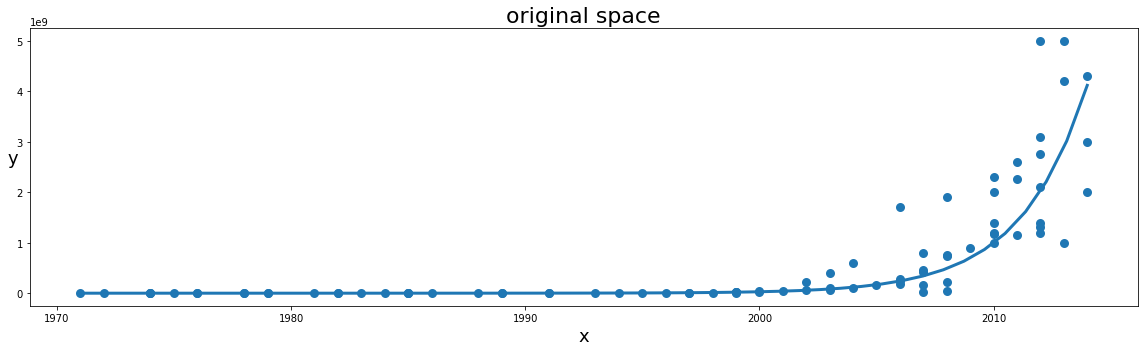

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

csvname = '../machine_learning_refined/machine_learning_refined/mlrefined_exercises/ed_2/mlrefined_datasets/nonlinear_superlearn_datasets/transistor_counts.csv'
data = np.asarray(pd.read_csv(csvname,header = None))
x = data[:,0]
x.shape = (len(x),1)
y = data[:,1]
y.shape = (len(y),1)
y_logged = np.log(y)
o = np.ones((len(x),1))
x_new = np.concatenate((o,x),axis = 1)
A = 0
b = 0
for i in range(len(x)):
    A += np.outer(x_new[i,:],x_new[i,:].T)
    b += y_logged[i]*x_new[i,:].T
w = np.linalg.solve(A,b)
fig = plt.figure(figsize = (16,5))
ax1 = fig.add_subplot(1,1,1) # panel for original space
ax1.scatter(x,y,linewidth = 3)
s = np.linspace(np.min(x),np.max(x))
t = np.exp(w[0] + w[1]*s)
ax1.plot(s,t,linewidth = 3)
ax1.set_xlabel('x',fontsize =18)
ax1.set_ylabel('y',rotation = 0,fontsize = 18)
ax1.set_title('original space',fontsize = 22);


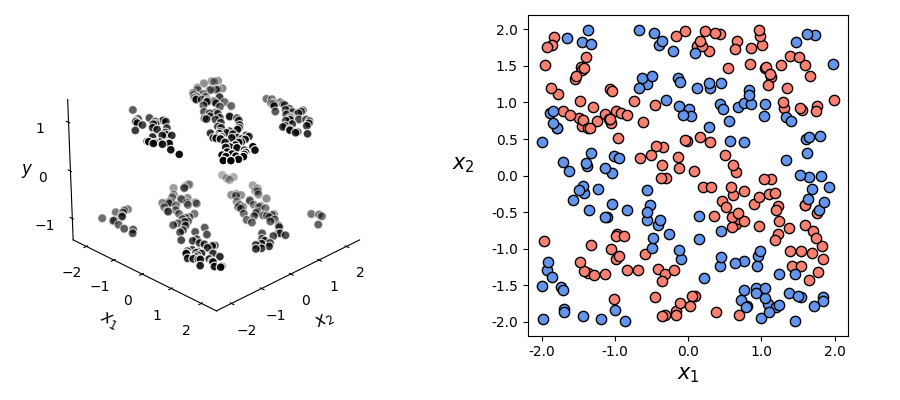

In [25]:
demo = nonlib.nonlinear_classification_visualizer.Visualizer('../mlrefined/mlrefined_datasets/nonlinear_superlearn_datasets/diagonal_stripes.csv')
x = demo.x.T
y = demo.y[np.newaxis,:]
demo.plot_data();

In [26]:
def feature_transforms(x,w):
    f = np.sin(w[0] + np.dot((x).T,w[1:])).T
    return f

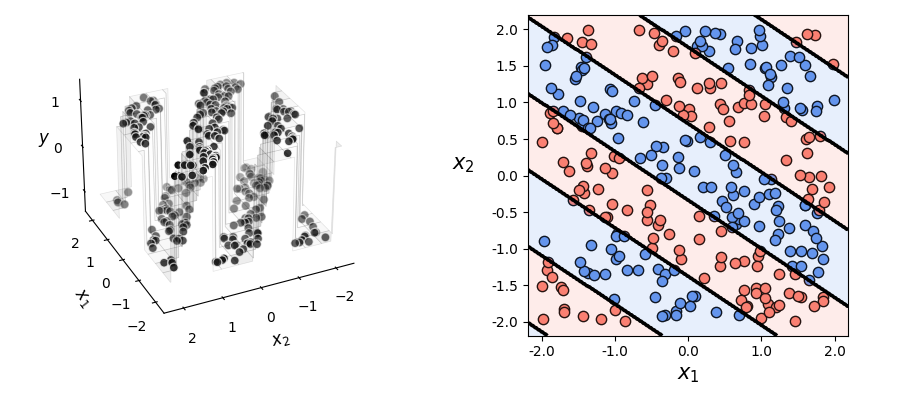

In [27]:
scale = 2
w = [scale*np.random.randn(3,1),scale*np.random.randn(2,1)]
maxx = 1000
a = 10**(-1)
run = nonlib.basic_runner.Setup(x,y,feature_transforms,'softmax',normalize = 'standard')
run.fit(w=w,alpha_choice = a,max_its = maxx)
ind = np.argmin(run.cost_history)
wh = run.weight_history[ind]
demo.static_N2_simple(wh,run,view = [30,155])

In [28]:
import sys
sys.path.append('../')
datapath = '../mlrefined/mlrefined_datasets/nonlinear_superlearn_datasets/'
import autograd.numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import copy
from mlrefined_libraries import nonlinear_superlearn_library as nonlib
from mlrefined_libraries import math_optimization_library as optlib
regress_plotter = nonlib.nonlinear_regression_demos_multiple_panels
classif_plotter = nonlib.nonlinear_classification_visualizer_multiple_panels
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

In [29]:
csvname = datapath + 'new_circle_data.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:]
degree = 8
num_bags = 5
train = 0.66
best = []
runs = []
for j in range(num_bags):
    lib = nonlib.reg_lib.super_setup.Setup(x,y)
    lib.preprocessing_steps(normalizer = 'none')
    lib.make_train_val_split(train_portion = train)
    for d in range(1,degree+1):
        lib.choose_cost(name = 'softmax')
        lib.choose_features(name = 'polys',degree = d)
        lib.fit(algo = 'newtons_method',max_its = 10,verbose = False,lam = 10**(-8))
    costs = [np.min(lib.valid_count_histories[i]) for i in range(degree)]
    mini = np.argmin(costs)
    minv = val_costs[mini]
    smallest_ind = np.argmin(lib.valid_count_histories[mini])
    lib.train_cost_histories = lib.train_cost_histories[mini][smallest_ind]
    lib.valid_cost_histories = lib.valid_cost_histories[mini][smallest_ind]
    lib.train_count_histories = lib.train_count_histories[mini][smallest_ind]
    lib.valid_count_histories = lib.valid_count_histories[mini][smallest_ind]
    lib.weight_histories = lib.weight_histories[mini][smallest_ind]
    lib.choose_features(name = 'polys',degree = mini + 1)
    best.append(copy.deepcopy(lib))

demo = nonlib.classification_bagging_visualizers_v2.Visualizer(csvname)
demo.show_runs(best)

NameError: name 'val_costs' is not defined

In [30]:
import time
from IPython.display import clear_output

In [31]:
def assign_to_folds(L,K):
# split data into k equal (as possible) sized sets
    order = np.random.permutation(L)
    c = np.ones((L,1))
    L = int(np.round((1/K)*L))
    for s in np.arange(0,K-2):
        c[order[s*L:(s+1)*L]] = s + 20
    c[order[(K-1)*L:]] = K
    return c
csvname = datapath + 'new_gene_data.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:]
K = 10
num_pts = y.size
fold_nums = assign_to_folds(num_pts,K)
lams = np.linspace(0,20,100)
all_train_counts = []
all_valid_counts = []
for k in range(K):
    lib = nonlib.kfolds_reg_lib.superlearn_setup.Setup(x,y)
    lib.choose_normalizer(name = 'standard')
    train_inds = np.argwhere(fold_nums != k)
    train_inds = [v[0] for v in train_inds]
    valid_inds = np.argwhere(fold_nums == k)
    valid_inds = [v[0] for v in valid_inds]
    lib.train_inds = train_inds
    lib.x_train = lib.x[:,train_inds]
    lib.y_train = lib.y[:,train_inds]
    lib.valid_inds = valid_inds
    lib.x_valid = lib.x[:,valid_inds]
    lib.y_valid = lib.y[:,valid_inds]
    lib.choose_cost(cost_name = 'softmax',reg_name = 'L1')
    lib.choose_optimizer('gradient_descent',max_its=100,alpha_choice='diminishing')
    lib.tryout_lams(lams)
    all_train_counts.append(copy.deepcopy(lib.train_count_vals))

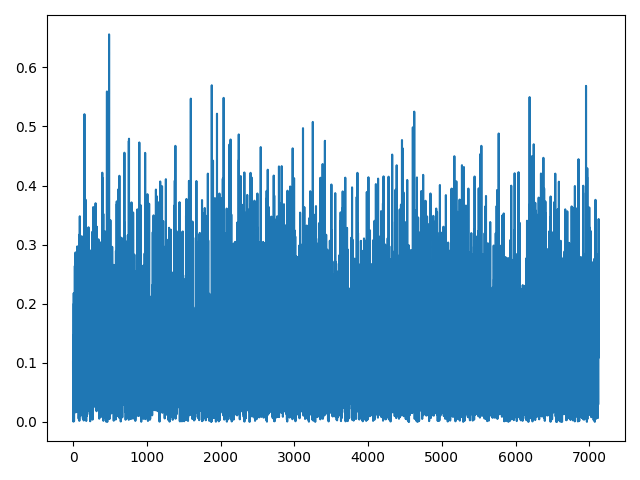

In [33]:
import matplotlib.pyplot as plt
plt.plot(np.abs(lib.best_weights[1:]))
plt.show()

In [14]:
import autograd.numpy as np
from datetime import datetime
import copy
import math
import sys
from mlrefined_libraries import math_optimization_library as optlib
from mlrefined_libraries import nonlinear_superlearn_library as nonlib
regress_plotter = nonlib.nonlinear_regression_demos
classif_plotter = nonlib.nonlinear_classification_visualizer_multiple_panels
static_plotter = optlib.static_plotter.Visualizer()
basic_runner = nonlib.basic_runner
classif_plotter_crossval = nonlib.crossval_classification_visualizer
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

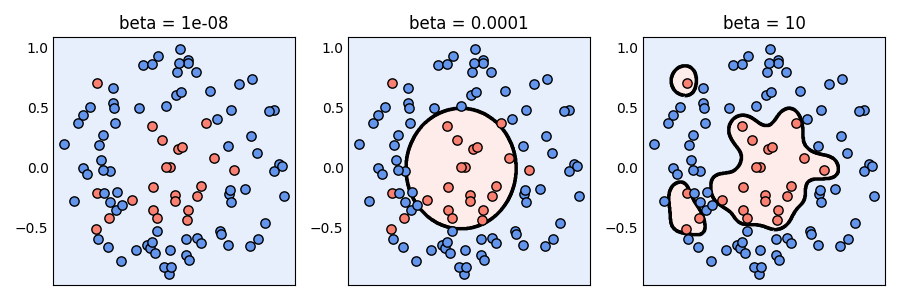

In [15]:
csvname = '../machine_learning_refined/mlrefined_datasets/nonlinear_superlearn_datasets/new_circle_data.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = copy.deepcopy(data[:-1,:])
y = copy.deepcopy(data[-1:,:])
betas = [10**(-8),10**(-4),10**(1)]
runs = []
for d in betas:
    lib = nonlib.kernel_lib.classic_superlearn_setup.Setup(x,y)
    lib.choose_normalizer(name = 'standard')
    lib.choose_cost(name = 'softmax')
    lib.choose_kernel(name = 'gaussian',beta = d,scale = 0)
    lib.fit(name = 'newtons_method',max_its = 5,verbose = False,epsilon = 10**(-10))
    runs.append(copy.deepcopy(lib))
demo = nonlib.kernel_visualizer.Visualizer(csvname)
labels = ['beta = ' + str(d) for d in betas]
demo.show_twoclass_runs(runs,labels = labels)

In [16]:
depth = 7
tree = nonlib.recursive_tree_lib.ClassificationTree.RTree(csvname,depth)
demo = nonlib.recursive_tree_lib.classification_animator.Visualizer(csvname)
demo.animate_trees(tree)

AttributeError: 'HTMLWriter' object has no attribute '_temp_names'

In [17]:
csvname = '../machine_learning_refined/mlrefined_datasets/nonlinear_superlearn_datasets/3_layercake_data.csv'
depth = 7
tree = nonlib.recursive_tree_lib.ClassificationTree.RTree(csvname,depth)
demo = nonlib.recursive_tree_lib.classification_animator.Visualizer(csvname)
demo.animate_trees(tree,pt_size = 20)

AttributeError: 'HTMLWriter' object has no attribute '_temp_names'

In [18]:
csvname = '../machine_learning_refined/mlrefined_datasets/nonlinear_superlearn_datasets/new_circle_data.csv'
trees = []
num_trees = 5
depth = 7
train_portion = 0.66
for i in range(num_trees):
tree = nonlib.recursive_tree_lib_crossval.ClassificationTree.RTree(csvname,de
pth,train_portion=train_portion)
trees.append(tree)
animator = nonlib.recursive_tree_lib_crossval.classification_ensembler.Visualizer
(csvname)
animator.show_runs(trees)

IndentationError: expected an indented block (4120864498.py, line 7)